<a href="https://colab.research.google.com/github/ZykinaViktoriya/Python_for_analytics/blob/main/Lection3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for analytics/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
users = df[['CustomerId', 'Surname', 'Geography', 'Gender', 'Age', 'EstimatedSalary']]
users

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10
...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,Male,39,96270.64
9996,15569892,Johnstone,France,Male,35,101699.77
9997,15584532,Liu,France,Female,36,42085.58
9998,15682355,Sabbatini,Germany,Male,42,92888.52


## Создание новых признаков

In [63]:
users['new_feature'] = 0
users.head()

<ipython-input-63-11ab127a3538>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['new_feature'] = 0


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [64]:
users['Age(days)'] = users['Age'] * 365
users.head()

<ipython-input-64-c6a474c3fa42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Age(days)'] = users['Age'] * 365


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age(days)
0,15634602,Hargrave,France,Female,42,101348.88,0,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695


In [65]:
for i, row in users.iloc[:2].iterrows():
  print(row)
  print('__' * 30)

CustomerId          15634602
Surname             Hargrave
Geography             France
Gender                Female
Age                       42
EstimatedSalary    101348.88
new_feature                0
Age(days)              15330
Name: 0, dtype: object
____________________________________________________________
CustomerId          15647311
Surname                 Hill
Geography              Spain
Gender                Female
Age                       41
EstimatedSalary    112542.58
new_feature                0
Age(days)              14965
Name: 1, dtype: object
____________________________________________________________


In [66]:
age_days = []

for i, row in users.iterrows():
  age_days.append(row['Age'] * 365)
age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

In [67]:
users['Age(days) 2'] = age_days
users.head()

<ipython-input-67-501c7649f54b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Age(days) 2'] = age_days


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age(days),Age(days) 2
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695


In [68]:
def age_to_days(x):
  return x * 365

users['Age(days) 3'] = users['Age'].apply(age_to_days)
users.head()

<ipython-input-68-a1214f8916f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Age(days) 3'] = users['Age'].apply(age_to_days)


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age(days),Age(days) 2,Age(days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695,15695


In [69]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
  time.sleep(0.001)
  return x * 365

users['Age'].progress_apply(age_to_days)

100%|██████████| 10000/10000 [00:11<00:00, 882.06it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

In [70]:
users = users.drop(columns='new_feature')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age(days),Age(days) 2,Age(days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695


In [71]:
users['new_feature'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age(days),Age(days) 2,Age(days) 3,new_feature
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330,0
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965,0
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330,0
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235,0
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695,0


In [72]:
users.drop(columns='new_feature', inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age(days),Age(days) 2,Age(days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695


In [73]:
users.drop(columns=['Age(days)', 'Age(days) 2', 'Age(days) 3'], inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10


## Изменение существующих признаков

In [74]:
users['target'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [75]:
users.loc[users['Geography'] == 'France']

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
6,15592531,Bartlett,France,Male,50,10062.80,0
8,15792365,He,France,Male,44,74940.50,0
...,...,...,...,...,...,...,...
9994,15719294,Wood,France,Female,29,167773.55,0
9995,15606229,Obijiaku,France,Male,39,96270.64,0
9996,15569892,Johnstone,France,Male,35,101699.77,0
9997,15584532,Liu,France,Female,36,42085.58,0


In [76]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

In [78]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,1
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,1
3,15701354,Boni,France,Female,39,93826.63,1
4,15737888,Mitchell,Spain,Female,43,79084.10,0


### .replace

In [79]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,F,42,101348.88,1
1,15647311,Hill,Spain,F,41,112542.58,0
2,15619304,Onio,France,F,42,113931.57,1
3,15701354,Boni,France,F,39,93826.63,1
4,15737888,Mitchell,Spain,F,43,79084.10,0


## Методы агрегации

### метод agg()

In [80]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

In [81]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


In [82]:
users.agg(
    min_age = ('Age', 'min'),
    max_age = ('Age', 'max'),
    mean_salary = ('EstimatedSalary', 'mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100090.239881


## Методы объединения

### .merge
Объединяет по колонкам

In [83]:
bank = df[['CustomerId',	'CreditScore',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'Exited']]
bank.head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0


In [84]:
bank.shape

(10000, 8)

In [85]:
merged = users.merge(bank, left_on = 'CustomerId', right_on = 'CustomerId')
merged.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,France,F,42,101348.88,1,619,2,0.00,1,1,1,1
1,15647311,Hill,Spain,F,41,112542.58,0,608,1,83807.86,1,0,1,0
2,15619304,Onio,France,F,42,113931.57,1,502,8,159660.80,3,1,0,1
3,15701354,Boni,France,F,39,93826.63,1,699,1,0.00,2,0,0,0
4,15737888,Mitchell,Spain,F,43,79084.10,0,850,2,125510.82,1,1,1,0


### .join
Объединяет по индексам. Необходимо создать новые индексы через .set_index() для каждой из таблиц и по ним объединить

In [86]:
users_id = users.set_index('CustomerId')
users_id.head()

,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,
15634602,Hargrave,France,F,42,101348.88,1
15647311,Hill,Spain,F,41,112542.58,0
15619304,Onio,France,F,42,113931.57,1
15701354,Boni,France,F,39,93826.63,1
15737888,Mitchell,Spain,F,43,79084.10,0


In [87]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15634602,619,2,0.00,1,1,1,1
15647311,608,1,83807.86,1,0,1,0
15619304,502,8,159660.80,3,1,0,1
15701354,699,1,0.00,2,0,0,0
15737888,850,2,125510.82,1,1,1,0


In [88]:
bank_id.join(users_id).head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,,,,,,,,
15634602,619,2,0.00,1,1,1,1,Hargrave,France,F,42,101348.88,1
15647311,608,1,83807.86,1,0,1,0,Hill,Spain,F,41,112542.58,0
15619304,502,8,159660.80,3,1,0,1,Onio,France,F,42,113931.57,1
15701354,699,1,0.00,2,0,0,0,Boni,France,F,39,93826.63,1
15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,F,43,79084.10,0


Вернуть дефолтные индексы можно методом .reset_index()

In [89]:
bank_id.join(users_id).reset_index().head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,619,2,0.00,1,1,1,1,Hargrave,France,F,42,101348.88,1
1,15647311,608,1,83807.86,1,0,1,0,Hill,Spain,F,41,112542.58,0
2,15619304,502,8,159660.80,3,1,0,1,Onio,France,F,42,113931.57,1
3,15701354,699,1,0.00,2,0,0,0,Boni,France,F,39,93826.63,1
4,15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,F,43,79084.10,0


In [90]:
bank.shape

(10000, 8)

## Атрибут how для слияния таблиц разной размерности

left join

right join

outer join/join

inner join

In [92]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(10000, 14)

In [93]:
merged_left.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

In [96]:
merged_inner = bank.merge(users, on='CustomerId', how='inner')
merged_inner.shape

(10000, 14)

## Методы группировок

### groupby

In [97]:
toy_df = pd.DataFrame({
    'client_id': [1,2,2,3,1,1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [98]:
grouped = toy_df.groupby('client_id')
grouped

In [99]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

In [100]:
grouped.sum()

<ipython-input-100-f22bc4e4f731>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.sum()


,price
client_id,
1,3256
2,582
3,39


In [101]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

In [102]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


### pivot_table

In [103]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [104]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


In [105]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [106]:
users.pivot_table(index='Geography',
                  columns='Gender',
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,F,M,Total
Geography,,,
France,99564.252755,100174.252495,99899.180814
Germany,102446.424124,99905.033959,101113.435102
Spain,100734.107475,98425.687680,99440.572281
Total,100601.541382,99664.576931,100090.239881


### crosstab

In [107]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [109]:
pd.crosstab(index=users['Geography'],
                  columns=users['Gender'],
                  values=users['EstimatedSalary'],
                  aggfunc='mean')

Gender,F,M
Geography,,
France,99564.252755,100174.252495
Germany,102446.424124,99905.033959
Spain,100734.107475,98425.687680


In [110]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


In [111]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


In [113]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


## Встроенные функции

### Гистограмма hist

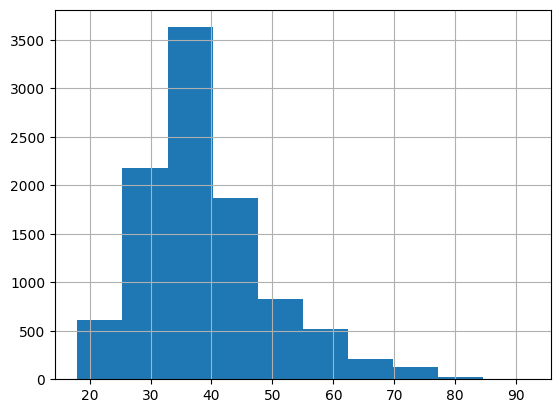

In [114]:
users['Age'].hist();

### пироги plot.pie
предварительно необходимо сгруппировать

In [115]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4543
M    5457
Name: Gender, dtype: int64

<Axes: ylabel='Gender'>

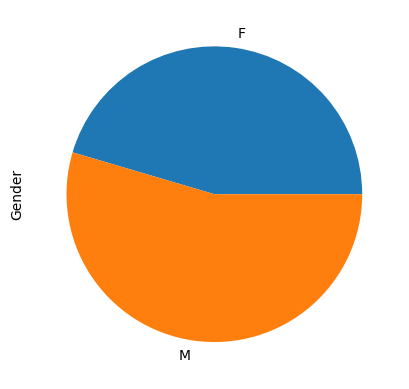

In [116]:
data.plot.pie(y='Gender')

### Точечные графики plot.scatter

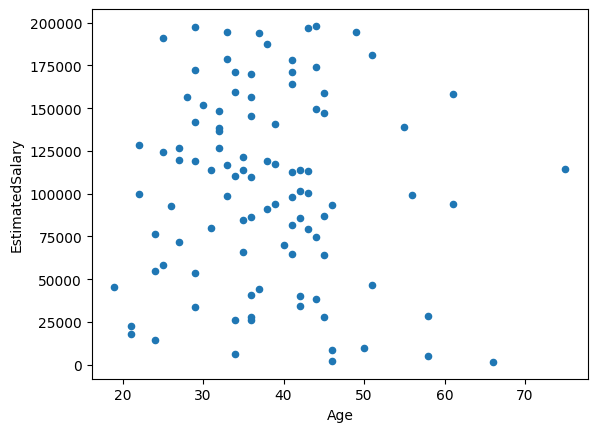

In [117]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

### Столбчатая диаграмма plot.bar
необходима предварительная группировка

In [118]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: num_clients, dtype: int64

<Axes: xlabel='Tenure'>

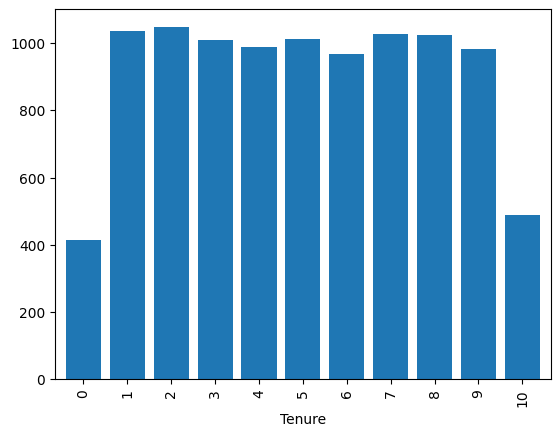

In [119]:
data.plot.bar(width=0.8)